Unsupervised learning 2: Clustering and Dimensionality reduction

Idag ska vi göra klustring och dimensionalitetsreduktion av irisdata med hjälp av Kmeans, DBSCAN och PCA.
- Vi ska alltså skicka in irisdatan till en modell, som sedan ska hitta mönster
- Vi kommer alltså inte skicka med några labels (svar, targets)
- Modellen kommer hitta klustrena själv
- Vi kommer även att reducera dimensioner i datan, men lite teori kring det innan vi kör igång

In [1]:
# Vi börjar med importer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn import datasets

In [2]:
# Vi läser in datan

iris = datasets.load_iris()

In [3]:
# Vi skapar en dataframe med datan
# Vi skapar även en dataframe med target, varför?
# Vi vill kunna jämföra våra resultat från klustringen med den verkliga datan

df_unscaled = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target


In [4]:
df_unscaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Här skulle vi vanligtvis ha alla steg från EDA (exploratory data analysis), vi skulle typiskt:

- Plotta datan
- Undersöka korrelationer
- Undersöka numeriska förhållanden
- Osv

In [5]:
# Vi noterar ett problem! Våra features är på olika skala
# För potentiellt bättre resultat bör vi normalisera datan

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df_unscaled), columns=df_unscaled.columns)

In [6]:
# Vi inspekterar vår nya dataframe

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [7]:
# Vi skapar en Kmeans-modell
# Vi initierar modellen, och tränar på ett bräde

kmeans = KMeans(n_clusters=3, random_state=42).fit(df)

In [8]:
# Vi skapar även en DBSCAN-modell

dbscan = DBSCAN(eps=1.1, min_samples=5).fit(df)

In [9]:
# Vi räknar ut en silhoutte score för att se hur bra vår modell är
# Silhoutte score är ett mått på hur tighta klustrena är
# 1 är bäst, -1 är sämst
# Vi använder typiskt silhoutte score för att jämföra olika modeller

from sklearn.metrics import silhouette_score

silhoutte_kmeans = silhouette_score(df, kmeans.labels_)
silhoutte_dbscan = silhouette_score(df, dbscan.labels_)


In [10]:
# Vi ser att vi har ett silhoutte score på 0.685, vilket är ganska bra
# I ett vakum så betyder det dock inte så mycket
# Används med viss aktsamhet

print("Sillhoutte score Kmeans: ", silhoutte_kmeans)
print("Sillhoutte score DBSCAN: ", silhoutte_dbscan)

Sillhoutte score Kmeans:  0.45994823920518635
Sillhoutte score DBSCAN:  0.5517715602892105


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Reference')

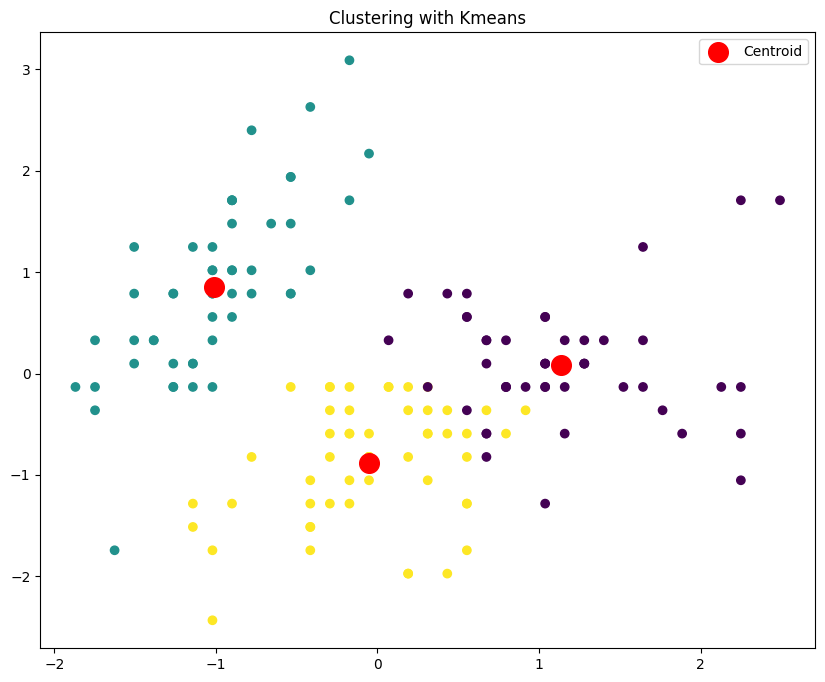

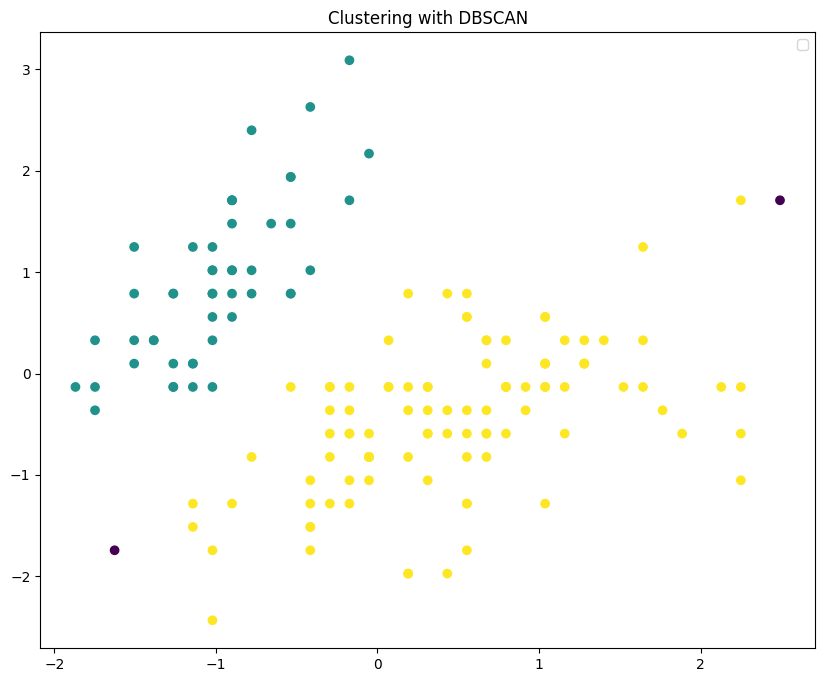

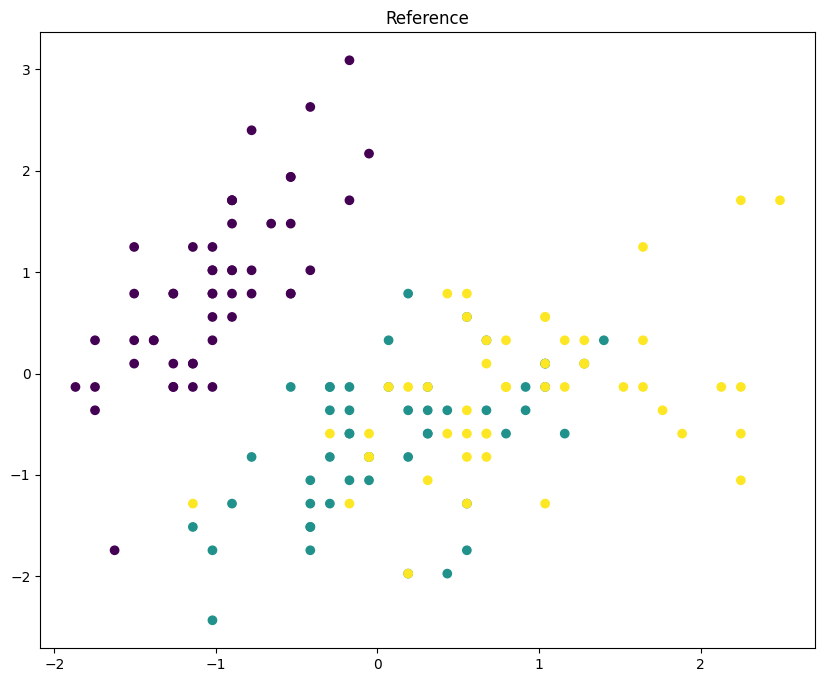

In [11]:
# Visualisera våra kluster
# Vi gör tre plottar: 
# En som visar klustrena som de ser ut enligt Kmeans
# En som visar klustrena som de ser ut enligt DBSCAN
# En som visar den faktiska indelningen (för klustring har vi sällan labels)

plt.figure(figsize=(10,8))
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = kmeans.labels_, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, marker='o', c="red", label = "Centroid")
plt.title("Clustering with Kmeans")
plt.legend()

plt.figure(figsize=(10,8))
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = dbscan.labels_, cmap="viridis")
plt.title("Clustering with DBSCAN")
plt.legend()

plt.figure(figsize=(10,8))
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = target, cmap="viridis")
plt.title("Reference")